In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
data_for_model = pd.read_csv('prepared_data.csv')

In [47]:
data_for_model.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough,temperature,precipitation,rain,cloudcover,windspeed
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,EWR,6.8,2.4,2.4,100.0,17.3
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,EWR,8.1,5.1,5.1,100.0,8.5
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,EWR,8.5,3.3,3.3,100.0,11.3
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,EWR,9.8,0.0,0.0,100.0,24.0
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,EWR,13.1,0.0,0.0,99.0,24.3


In [48]:
data_for_model.columns

Index(['PULocationID', 'transaction_date', 'transaction_month',
       'transaction_day', 'transaction_hour', 'trip_distance', 'total_amount',
       'count_of_transactions', 'transaction_week_day', 'weekend',
       'is_holiday', 'Borough', 'temperature', 'precipitation', 'rain',
       'cloudcover', 'windspeed'],
      dtype='object')

In [59]:
categorical_features = ['PULocationID', 'transaction_month','transaction_day', 'transaction_hour',
                        'transaction_week_day', 'weekend', 'is_holiday', 'Borough']
input_features = categorical_features + ['temperature', 'precipitation', 'rain', 'cloudcover', 'windspeed']
target_feature = "total_amount"

data_for_model.dtypes

#convert categorical features to string
for i in categorical_features:
    data_for_model[i] = data_for_model[i].astype(str)


In [61]:
data_for_model.dtypes

PULocationID              object
transaction_date          object
transaction_month         object
transaction_day           object
transaction_hour          object
trip_distance            float64
total_amount             float64
count_of_transactions      int64
transaction_week_day      object
weekend                   object
is_holiday                object
Borough                   object
temperature              float64
precipitation            float64
rain                     float64
cloudcover               float64
windspeed                float64
dtype: object

## Train Test Splint

In [90]:
from sklearn.model_selection import train_test_split

X = data_for_model[input_features]
y = data_for_model[target_feature]

# one-hot encode
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Decision Tree

In [68]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor(max_depth=10)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [70]:
model_at_hand = decision_tree

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print("Mean absolute error: ", mean_absolute_error(y_test, y_pred))
print("Mean squared error: ", mean_squared_error(y_test, y_pred))
print("Root mean squared error: ", sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score: ", r2_score(y_test, y_pred))

Mean absolute error:  9.02152429040029
Mean squared error:  204.87207514718588
Root mean squared error:  14.313353036489595
R2 score:  0.30375830172620466


<Axes: xlabel='true', ylabel='pred'>

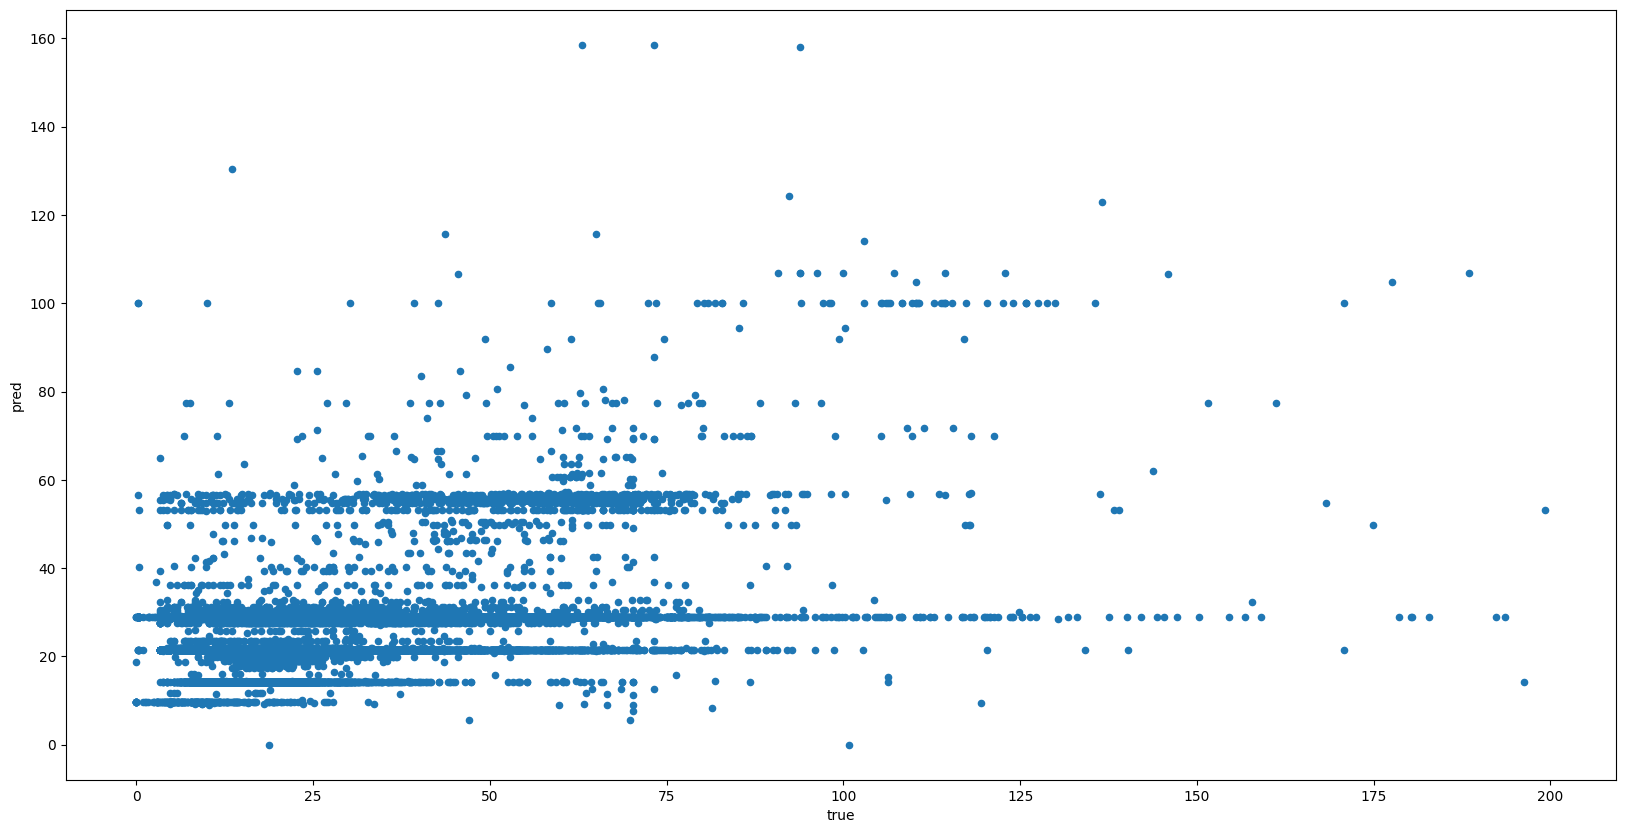

In [72]:
data = {'true': y_test, 'pred': y_pred}

results = pd.DataFrame(data)

#results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

## Overfit

In [75]:
X_train_overfit = X_train
X_test_overfit = X_test

y_train_overfit = y_train
y_test_overfit = y_test

In [80]:
rmse_scores = {"max_depth": [], "rmse_train": [], "rmse_test": []}

for md in [2, 5, 8, 10, 15, 20, 30, 50, 70, 100, 150]:
    decision_tree = DecisionTreeRegressor(max_depth=md)
    decision_tree.fit(X_train_overfit, y_train_overfit)

    model_at_hand_overfit = decision_tree

    y_train_pred = model_at_hand_overfit.predict(X_train_overfit)
    y_test_pred = model_at_hand_overfit.predict(X_test_overfit)

    rmse_train = sqrt(mean_squared_error(y_train_overfit, y_train_pred))
    rmse_test = sqrt(mean_squared_error(y_test_overfit, y_test_pred))

    rmse_scores["max_depth"].append(md)
    rmse_scores["rmse_train"].append(rmse_train)
    rmse_scores["rmse_test"].append(rmse_test)

In [82]:
pd.DataFrame.from_dict(rmse_scores)

,max_depth,rmse_train,rmse_test
0,2,1.544473e+01,15.408023
1,5,1.470139e+01,14.778048
2,8,1.415275e+01,14.453335
3,10,1.380670e+01,14.295693
4,15,1.291740e+01,14.435841
5,20,1.210135e+01,14.597137
6,30,1.057175e+01,14.898446
7,50,7.557641e+00,16.048723
8,70,4.368484e+00,16.947820
9,100,7.983713e-01,17.435484


Text(0, 0.5, 'root mean squared error')

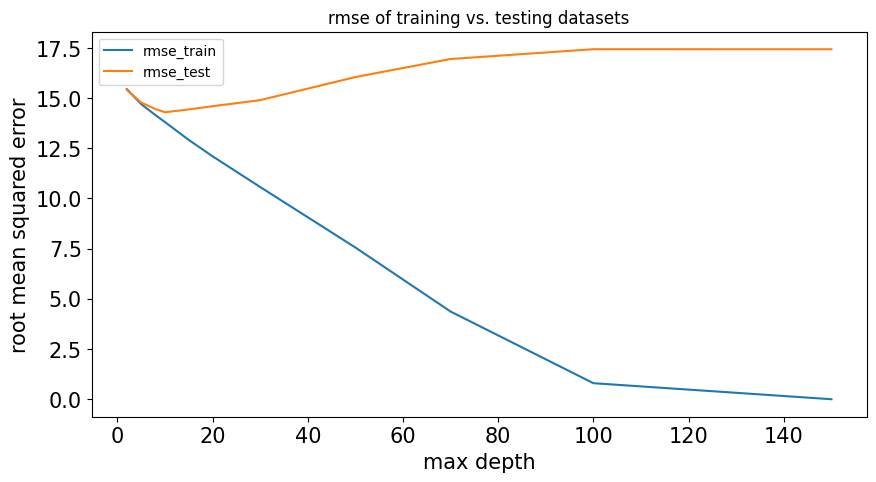

In [85]:
#Let's plot a graph to see a pivot point

ax = pd.DataFrame.from_dict(rmse_scores).plot(figsize = (10,5), title="rmse of training vs. testing datasets", fontsize=15, x='max_depth')
ax.set_xlabel("max depth", fontsize=15)
ax.set_ylabel("root mean squared error", fontsize=15)

## Random forest

In [87]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

RandomForestRegressor()

In [91]:
model_at_hand = random_forest

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print("Mean absolute error: ", mean_absolute_error(y_test, y_pred))
print("Mean squared error: ", mean_squared_error(y_test, y_pred))
print("Root mean squared error: ", sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score: ", r2_score(y_test, y_pred))

Mean absolute error:  7.653077488314341
Mean squared error:  178.19326461902656
Root mean squared error:  13.348904997003558
R2 score:  0.3944241493616413


<Axes: xlabel='true', ylabel='predicted'>

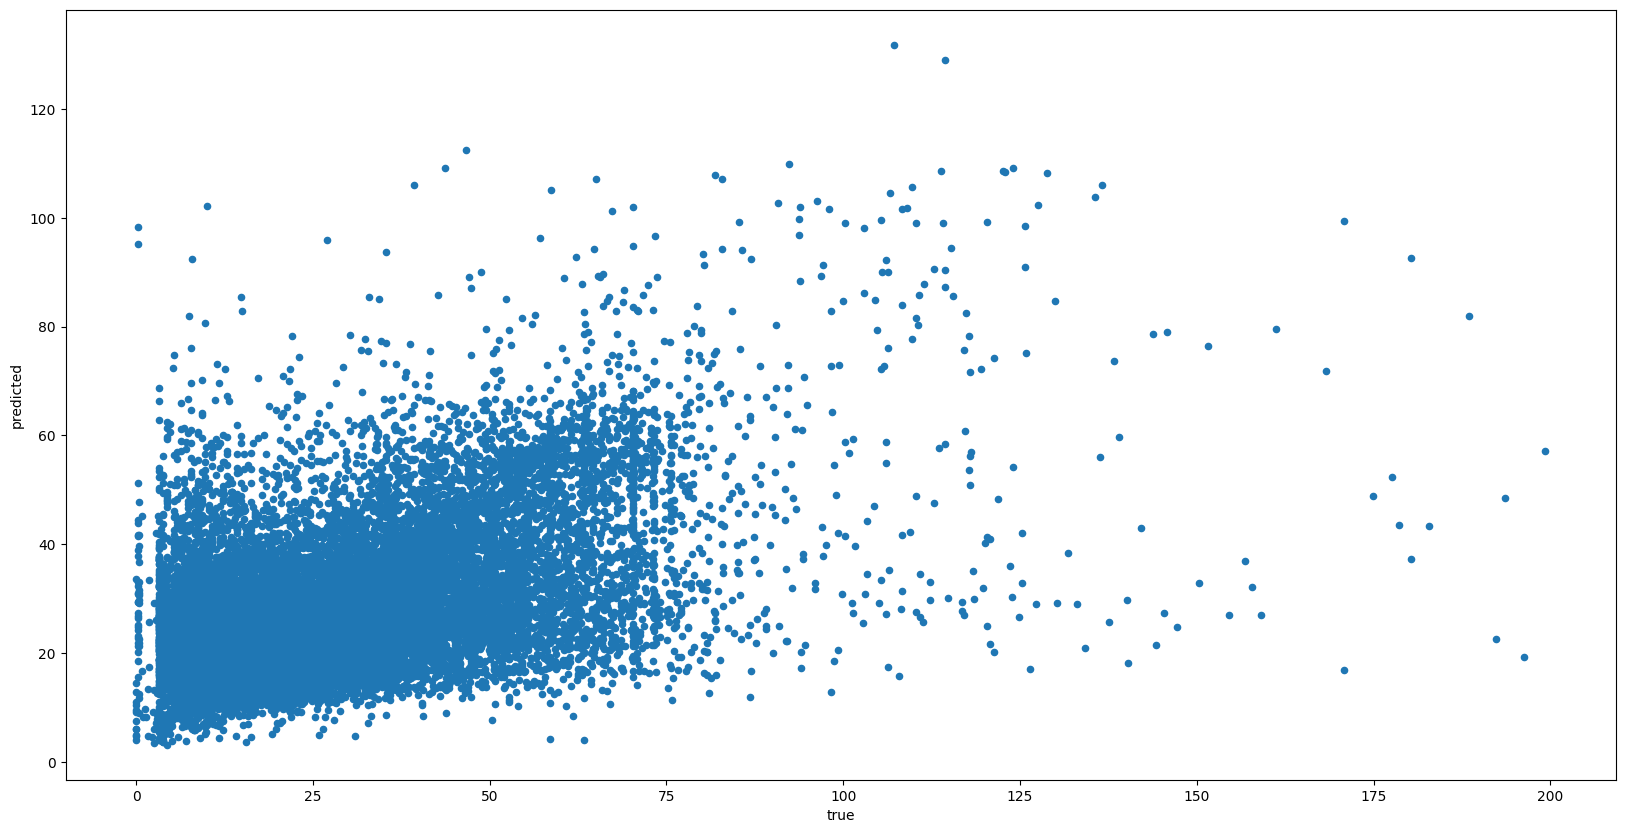

In [97]:
data = {"true": y_test, "predicted": y_pred}
results = pd.DataFrame(data)

results.plot(figsize =(20,10), kind = "scatter", x = "true", y = "predicted")